# Classification And Regression Tree (Python)
Yang Xi <br>
15 Nov, 2018


<br>

- Example: Classification with Imbalanced Class
	- Tune `max_depth` Through Cross-Validation
	- Model Interpretation: Tree Plot
	- Train Performance
	- Test Performance

# Example: Classification with Imbalanced Class

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

dfTrain0 = pd.read_csv("../../data/(2016 UCI) Credit Default/data_train.csv")
dfTest0 = pd.read_csv("../../data/(2016 UCI) Credit Default/data_test.csv")

def prepTrainTest(df):
    df = pd.get_dummies(df, columns=['Default', 'Sex', 'Marriage'], drop_first=True)
    df = pd.get_dummies(df, columns=['Education', 'SepRepayment']).drop(['Education_high school', 'SepRepayment_paid'], axis=1)
    return df
dfTrain = prepTrainTest(dfTrain0)
XTrain = dfTrain.drop('Default_1',axis=1)

yTrain = dfTrain['Default_1']

### Tune `max_depth` Through Cross-Validation
To see progress, set `verbose=2`

Optimal max_depth value = 2
CV f1 score with optimal max_depth value = 0.515


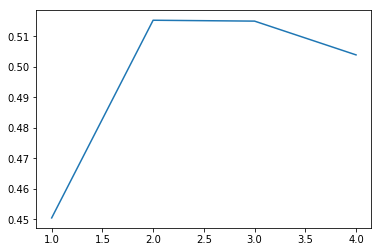

In [2]:
rangeMaxDepth = np.arange(1, 5, 1).tolist()
cartGS = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'),
                      param_grid = [{'max_depth': rangeMaxDepth}],
                      scoring = make_scorer(f1_score, greater_is_better=True),
                      cv=10, verbose=0)
cartGS.fit(XTrain, yTrain)

plt.plot(rangeMaxDepth, cartGS.cv_results_['mean_test_score'])
print('Optimal max_depth value = {0}'.format(cartGS.best_params_['max_depth']))
print('CV f1 score with optimal max_depth value = {0:.3f}'.format(cartGS.best_score_))

### Model Interpretation: Tree Plot

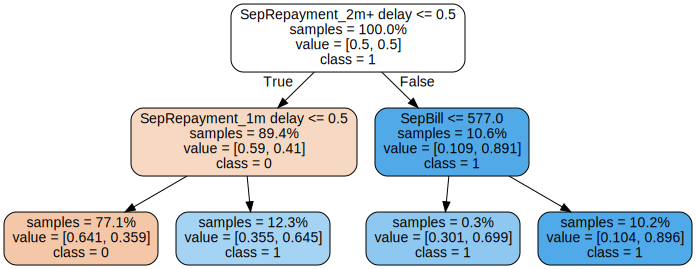

In [3]:
from sklearn.tree import export_graphviz
import graphviz

cartFit = cartGS.best_estimator_

cartPlot = export_graphviz(cartFit, out_file=None,
                           feature_names=XTrain.columns,
                           class_names=["0", "1"],
                           filled=True, rounded=True,
                           impurity=False, proportion=True)
graphviz.Source(cartPlot) # this displays in IDE but not in html

# Code below are for proper displaying in html rander by markdown
#import pydotplus
#from IPython.display import Image
#pydot_graph = pydotplus.graph_from_dot_data(cartPlot)
#display(Image(pydot_graph.create_png()))

### Train Performance

In [4]:
probTrain = [x[1] for x in cartFit.predict_proba(XTrain)]
predTrain = cartFit.predict(XTrain)

cmTrain = pd.DataFrame(confusion_matrix(yTrain, predTrain))
cmTrain.columns = pd.Series(cmTrain.columns).apply(lambda s: 'pred'+str(s))
cmTrain.index = pd.Series(cmTrain.index).apply(lambda s: 'actual'+str(s))
cmTrain

perfTrain = pd.DataFrame({'F1':[round(f1_score(yTrain, predTrain), 3)],
                          'AUC':[round(roc_auc_score(yTrain, probTrain),3)]})
print(perfTrain)


      F1    AUC
0  0.515  0.702


### Test Performance

In [5]:

dfTest = prepTrainTest(dfTest0)
XTest = dfTest.drop('Default_1',axis=1)
yTest = dfTest['Default_1']
    
predTest = cartFit.predict(XTest)

cmTest = pd.DataFrame(confusion_matrix(yTest, predTest))
cmTest.columns = pd.Series(cmTest.columns).apply(lambda s: 'pred'+str(s))
cmTest.index = pd.Series(cmTest.index).apply(lambda s: 'actual'+str(s))
cmTest

f1Test = f1_score(yTest, predTest)
print('Test f1 score = {0:.3f}'.format(f1Test))

Test f1 score = 0.504
